# Exploratory Data Analysis on Anscombe's Quartet
**Author:** Mohamed (GitHub: 783009)  
**Date:** 2025-10-07  

*This notebook performs a full exploratory data analysis (EDA) on Anscombe's Quartet, highlighting the importance of visual inspection alongside summary statistics.*

## Abstract
Anscombe's Quartet consists of four datasets with nearly identical summary statistics (means, variances, correlations, and regression lines) but dramatically different distributions when graphed. This notebook demonstrates how summary statistics alone can be misleading and highlights the role of visualization in exploratory data analysis (EDA). Multiple plots, including scatter plots, regression lines, residuals, boxplots, and violin plots are presented, alongside interactive visualizations using Plotly and Altair.


In [1]:
# -------------------------------
# 1️⃣ Imports
# -------------------------------
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

# -------------------------------
# 2️⃣ Load CSV (wide format)
# -------------------------------
df_wide = pd.read_csv("anscombe.csv")

# Rename columns for consistency
df_wide = df_wide.rename(columns={
    'x123': 'x1',
    'x4': 'x4',
    'y1': 'y1', 'y2': 'y2', 'y3': 'y3', 'y4': 'y4'
})

print("Wide-format data:")
display(df_wide.head())

Wide-format data:


,x1,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47


## Data
The dataset is loaded from `anscombe.csv` and initially in a wide format, with separate columns for each dataset's X and Y values.  
We convert it to a long format (`dataset`, `x`, `y`) to facilitate grouping and analysis.

In [2]:
# -------------------------------
# 3️⃣ Convert to long format
# -------------------------------
df_list = []
for i in range(1,5):
    x_col = 'x1' if i < 4 else 'x4'
    y_col = f'y{i}'
    temp = pd.DataFrame({
        'dataset': [f'Dataset {i}'] * len(df_wide),
        'x': df_wide[x_col],
        'y': df_wide[y_col]
    })
    df_list.append(temp)

df = pd.concat(df_list, ignore_index=True)

print("Long-format data:")
display(df.head())

# -------------------------------
# 4️⃣ Summary statistics
# -------------------------------
results = []
for dataset_name, group in df.groupby('dataset'):
    x = group['x']
    y = group['y']
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)
    cov_xy = np.cov(x, y)[0, 1]
    corr = np.corrcoef(x, y)[0,1]
    
    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    r_squared = r_value**2
    
    results.append({
        "Dataset": dataset_name,
        "Mean X": round(mean_x,2),
        "Mean Y": round(mean_y,2),
        "Var X": round(var_x,2),
        "Var Y": round(var_y,2),
        "Std X": round(std_x,2),
        "Std Y": round(std_y,2),
        "Cov XY": round(cov_xy,2),
        "Correlation": round(corr,2),
        "Slope": round(slope,2),
        "Intercept": round(intercept,2),
        "R²": round(r_squared,2)
    })

summary = pd.DataFrame(results)
print("\nSummary Statistics:")
display(summary)


Long-format data:


,dataset,x,y
0,Dataset 1,10.0,8.04
1,Dataset 1,8.0,6.95
2,Dataset 1,13.0,7.58
3,Dataset 1,9.0,8.81
4,Dataset 1,11.0,8.33



Summary Statistics:


,Dataset,Mean X,Mean Y,Var X,Var Y,Std X,Std Y,Cov XY,Correlation,Slope,Intercept,R²
0,Dataset 1,9.0,7.5,11.0,4.13,3.32,2.03,5.5,0.82,0.5,3.0,0.67
1,Dataset 2,9.0,7.5,11.0,4.13,3.32,2.03,5.5,0.82,0.5,3.0,0.67
2,Dataset 3,9.0,7.5,11.0,4.12,3.32,2.03,5.5,0.82,0.5,3.0,0.67
3,Dataset 4,9.0,7.5,11.0,4.12,3.32,2.03,5.5,0.82,0.5,3.0,0.67


## Summary Statistics
The following table summarizes each dataset’s key statistics:

- Mean and variance of X and Y
- Standard deviations
- Covariance between X and Y
- Pearson correlation
- Regression slope and intercept
- Coefficient of determination (R²)

These metrics demonstrate why the four datasets look similar numerically but can behave very differently when visualized.

## Scatter Plots with Regression Lines
These scatter plots show the relationship between X and Y for each dataset along with the fitted ordinary least squares (OLS) regression line.

**Observations:**
- Dataset 1: Clear linear relationship.
- Dataset 2: Non-linear pattern not captured by the linear regression.
- Dataset 3: A vertical outlier affects the regression line.
- Dataset 4: A single leverage point dominates the regression.


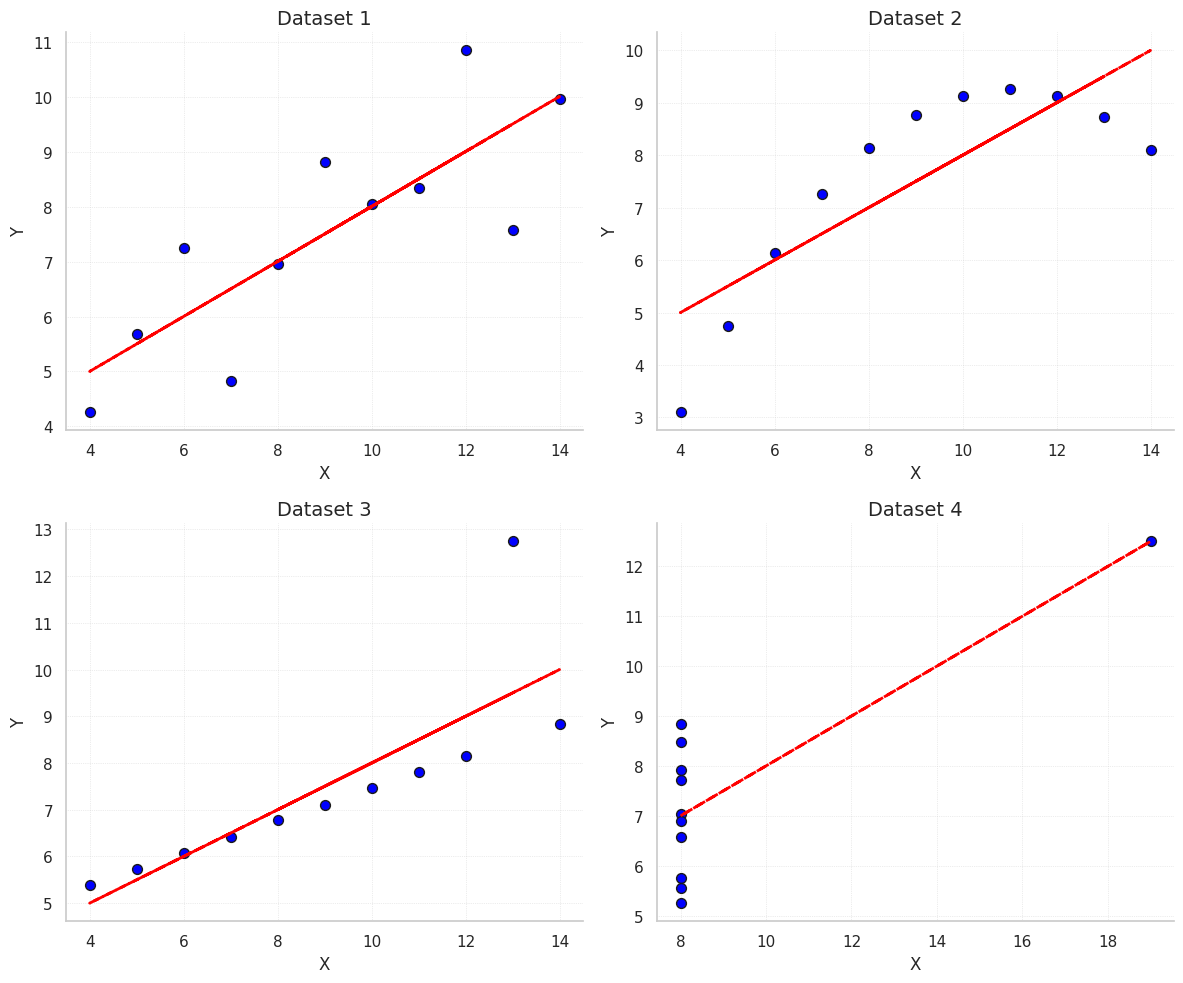

In [3]:
# -------------------------------
# 5️⃣ Scatter plots + regression
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

for i, (dataset_name, group) in enumerate(df.groupby('dataset')):
    x = group['x']
    y = group['y']
    
    # Scatter plot
    axes[i].scatter(x, y, color='blue', s=50, edgecolor='k')
    
    # Regression line
    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    y_pred = slope * x + intercept
    axes[i].plot(x, y_pred, color='red', linestyle='--', linewidth=2)
    
    # Titles and labels
    axes[i].set_title(f"{dataset_name}", fontsize=14)
    axes[i].set_xlabel("X", fontsize=12)
    axes[i].set_ylabel("Y", fontsize=12)
    
    # Remove top/right spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    axes[i].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

## Residual Plots
Residual plots show the difference between the observed Y values and those predicted by the regression line.  
- Large residuals indicate points poorly explained by the linear model.
- Dataset 2 shows a curved pattern in residuals, confirming non-linearity.
- Dataset 3’s vertical outlier has a large residual.
- Dataset 4’s leverage point has a small residual but heavily influences the regression.

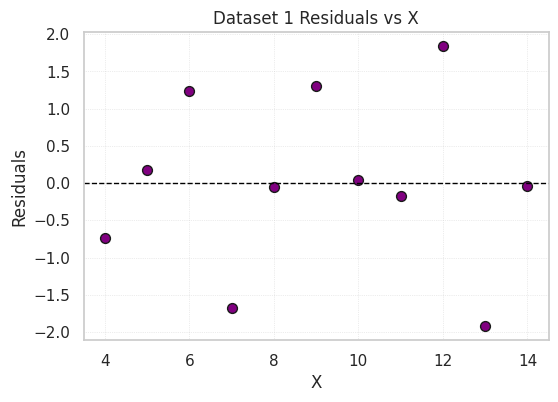

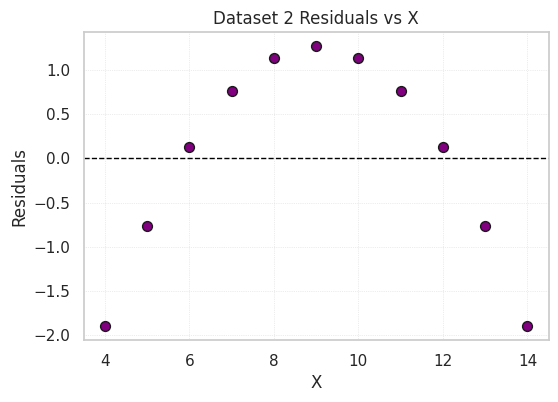

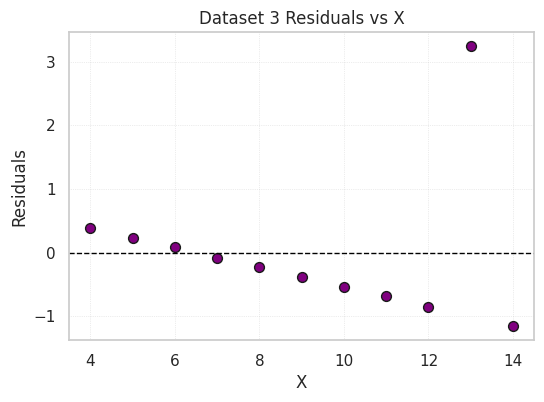

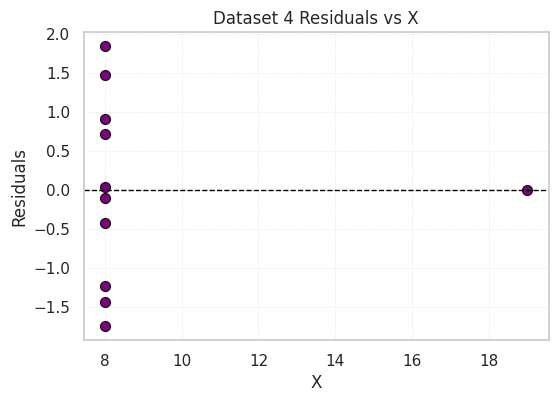

In [4]:
# -------------------------------
# 6️⃣ Residual plots
# -------------------------------
for dataset_name, group in df.groupby('dataset'):
    x = group['x']
    y = group['y']
    slope, intercept, _, _, _ = stats.linregress(x, y)
    y_pred = slope*x + intercept
    resid = y - y_pred
    
    plt.figure(figsize=(6,4))
    plt.scatter(x, resid, color='purple', s=50, edgecolor='k')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f"{dataset_name} Residuals vs X")
    plt.xlabel("X")
    plt.ylabel("Residuals")
    plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
    plt.show()

## Distribution Comparisons
Boxplots and violin plots of X and Y values per dataset show differences in spread and identify outliers.

- Boxplots display median, quartiles, and potential outliers.
- Violin plots (if added) visualize the full distribution shape.

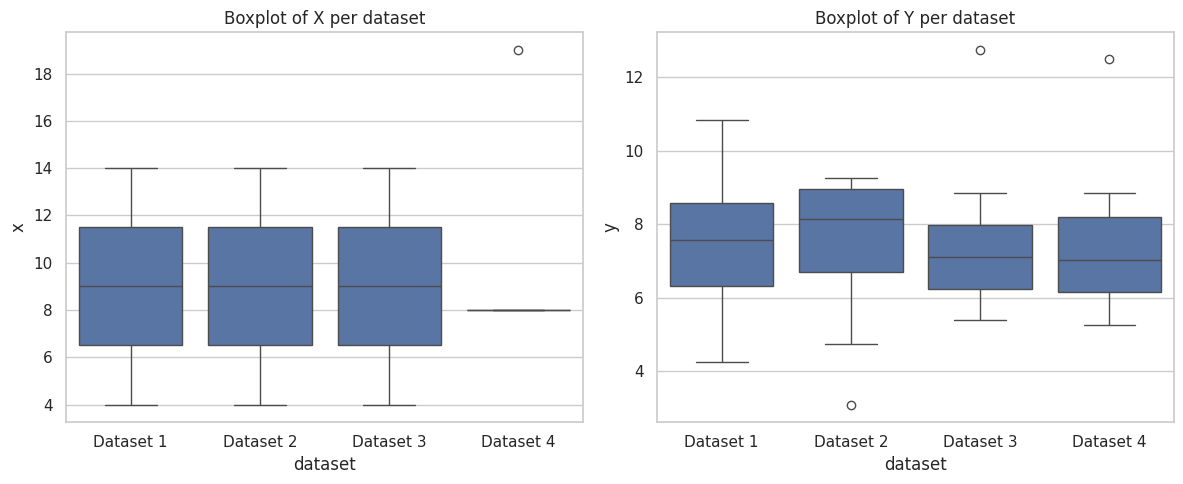

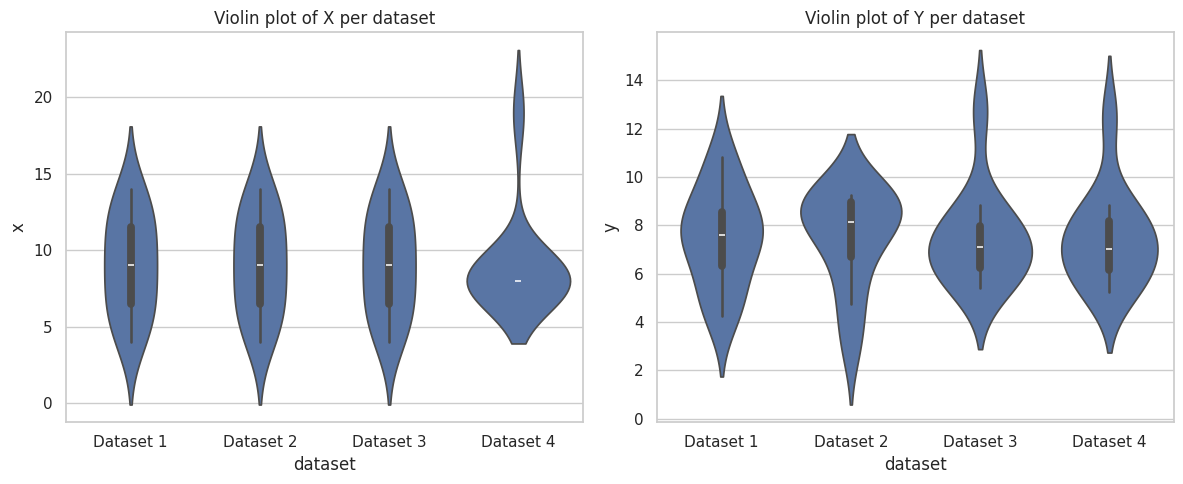

In [5]:
# -------------------------------
# 7️⃣ Boxplots and violin plots
# -------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='dataset', y='x', data=df)
plt.title("Boxplot of X per dataset")

plt.subplot(1,2,2)
sns.boxplot(x='dataset', y='y', data=df)
plt.title("Boxplot of Y per dataset")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.violinplot(x='dataset', y='x', data=df)
plt.title("Violin plot of X per dataset")

plt.subplot(1,2,2)
sns.violinplot(x='dataset', y='y', data=df)
plt.title("Violin plot of Y per dataset")
plt.tight_layout()
plt.show()

## Faceted Scatter Plots
This combined plot displays all four datasets side by side for comparison. It highlights how similar summary statistics can correspond to very different distributions.

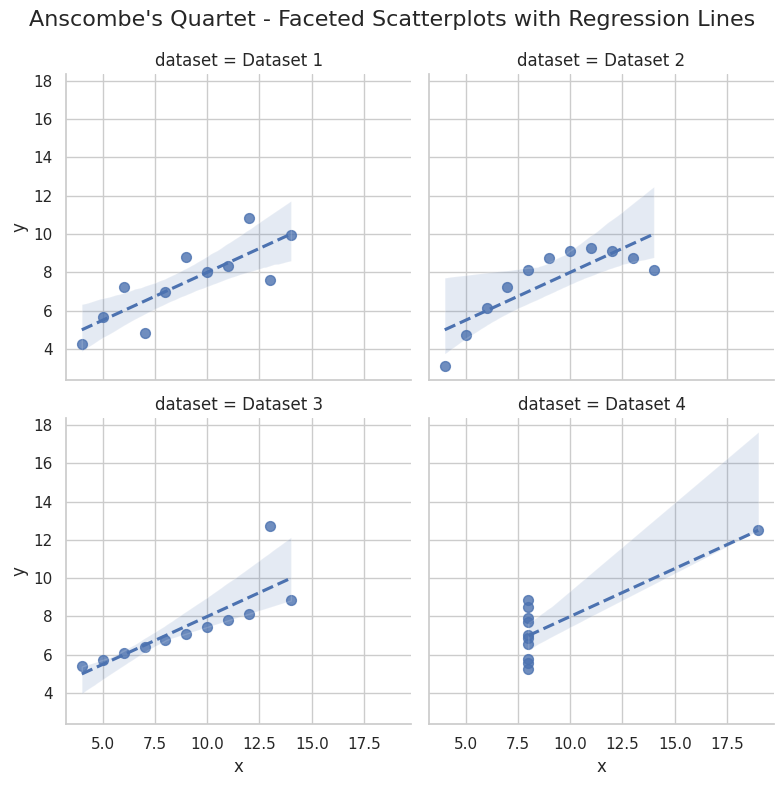

In [6]:
#-------------------------------
# 8️⃣ Faceted comparison (scatter + regression)
# -------------------------------
sns.lmplot(data=df, x='x', y='y', col='dataset', col_wrap=2,
           height=4, aspect=1, scatter_kws={'s':50}, line_kws={'ls':'--'})
plt.subplots_adjust(top=0.9)
plt.suptitle("Anscombe's Quartet - Faceted Scatterplots with Regression Lines", fontsize=16)
plt.show()

## Interactive Visualizations
Interactive scatter plots allow zooming, hovering, and dataset selection.  
- Plotly scatter plot: interactive faceted view.
- Altair plot: overlaid dataset comparison.
These visualizations enhance exploratory analysis beyond static plots.

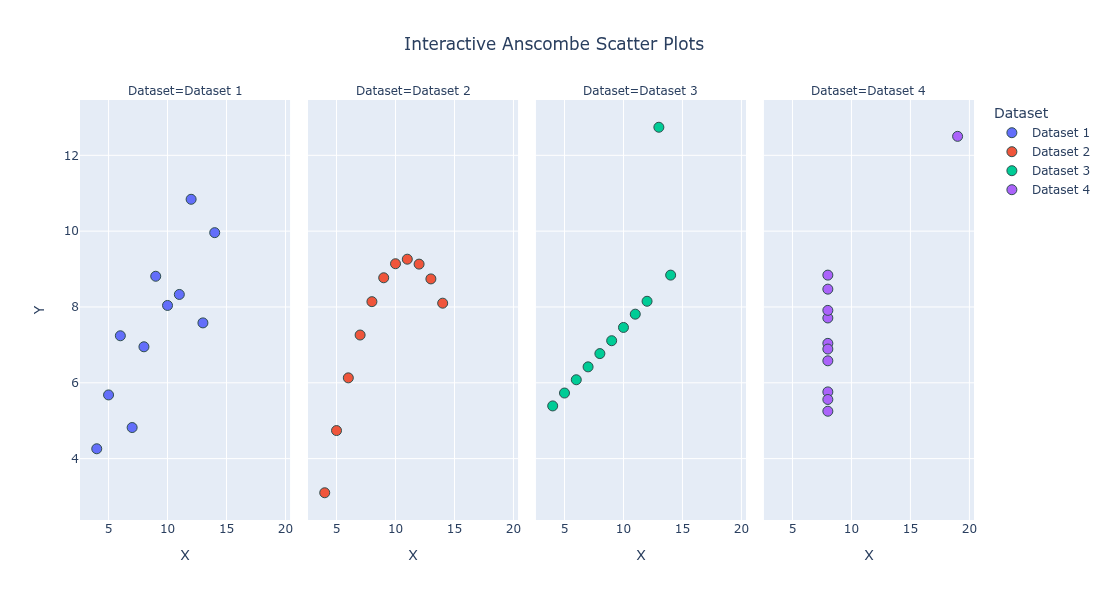

In [9]:
import plotly.express as px

# Interactive scatter plot with facets per dataset
fig = px.scatter(
    df,  # long-format dataframe
    x='x',
    y='y',
    color='dataset',
    facet_col='dataset',  # creates one plot per dataset
    title="Interactive Anscombe Scatter Plots",
    labels={'x': 'X', 'y': 'Y', 'dataset': 'Dataset'},
    height=600,
    width=900
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title_x=0.5)  # center title

# Show in notebook
fig.show()

# Optional: save as HTML to include in GitHub/portfolio
fig.write_html("output/anscombe_plotly.html")


## Conclusion & Future Work
Despite nearly identical summary statistics, the four datasets show very different behaviors when visualized. This demonstrates why EDA should combine numeric summaries and visual inspection.

**Future directions / ideas:**
- Apply robust regression methods to reduce influence of outliers.
- Compute Cook's distance or leverage points to detect influential observations.
- Use bootstrapping for slope/intercept confidence intervals.
- Publish interactive dashboards using Plotly or Altair.